In [91]:
#Import all
import pandas as pd
from string import punctuation
import re
import numpy as np


## Dataset

In [92]:
df = pd.read_csv('D:\D3.csv', encoding='utf-8')

In [93]:
print(df.head())

   Sentiment                                             Review
0          1  লোগান এক্সমেন সিরিজের দশম কিস্তি এবং উলভারিনের...
1          1      গেম অব থ্রোন্স রিভিও বলবো না এটা জাস্ট ফিলিংস
2          1  এর প্রত্যেকটা মোমেন্ট| ডায়লগ| ক্যারাক্টার| সম্...
3          0  জোকারের ইতিহাস সৃষ্টি করা মুভি দ্য ডার্ক নাইট"...
4          1  যাই হোক বলবো আজ এক এমন ভালোবাসার গল্প যা আপনার...


In [94]:
print(df.tail())

      Sentiment                                             Review
3996          1  এই সিরিজটি এক কথায় আমার অন্যতম পছন্দের মুভি সি...
3997          0        মুভিটা মাথার উপর দিয়ে গেল...কিছুই বুঝলাম না
3998          0  একটু আগেই মুভি টা দেখলাম মাথা পুরা জ্যাম হয়ে গ...
3999          0                        মুভি দেখে মাথা নষ্ট হয়ে গেল
4000          0                   এত বছর পরে দেখেন এই মুভির সিরিজ?


In [95]:
print(df.describe())

         Sentiment
count  4001.000000
mean      0.506123
std       0.500025
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


## Data Visualization

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [97]:
df.isnull().sum()

Sentiment    0
Review       0
dtype: int64

Text(0.5, 1.0, 'Visualization of Missing Values')

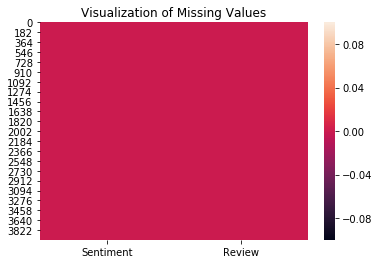

In [98]:
sns.heatmap(df.isnull())
plt.title('Visualization of Missing Values')

In [99]:
df.shape

(4001, 2)

Text(0.5, 1.0, 'Review Feature Visualization')

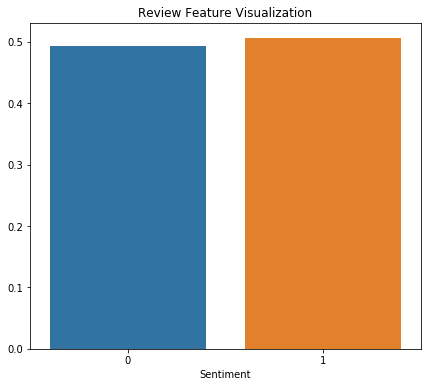

In [100]:
dist = df.groupby(["Sentiment"]).size()
dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(7,6))
sns.barplot(dist.keys(), dist.values);
plt.title('Review Feature Visualization')

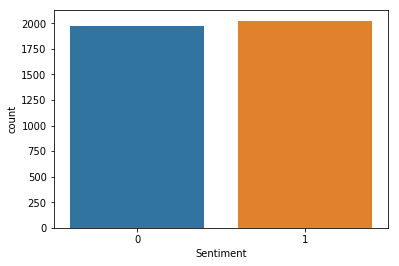

In [101]:
sns.countplot(x='Sentiment', data=df)

## Preprocessing

In [102]:
reviewList = df['Review'].tolist()
target = df['Sentiment']
#print(reviewList)
#print("\n")


In [103]:
#Preprocessing data : clean,punctuation,specitial character remove
token = []
sent = []

for i in range(len(reviewList)):
           clean = [reviewList[i]
           .replace("!"," ").replace("@","").replace("#","").replace("$","").replace("%","").replace("^","").replace("&","")
           .replace("*","").replace("(","").replace(")","").replace("_","").replace("-","").replace("+","").replace("=","")
           .replace(":","").replace(";","").replace("'","").replace("<","").replace(">","").replace(","," ").replace(".","")
           .replace("~","").replace("`","").replace("০","").replace("0","").replace("১","").replace("1","").replace("২","")
           .replace("2","").replace("৩","").replace("3","").replace("৪","").replace("4","").replace("৫","").replace("5","")
           .replace("৬","").replace("6","").replace("৭","").replace("7","").replace("৮","").replace("8","").replace("৯","")
           .replace("9","").replace("a","").replace("A","").replace("b","").replace("B","").replace("c","").replace("C","")
           .replace("d","").replace("D","").replace("e","").replace("E","").replace("f","").replace("F","").replace("g","")
           .replace("G","").replace("h","").replace("H","").replace("i","").replace("I","").replace("j","").replace("J","")
           .replace("k","").replace("K","").replace("l","").replace("L","").replace("m","").replace("M","").replace("n","")
           .replace("N","").replace("o","").replace("O","").replace("p","").replace("P","").replace("q","").replace("Q","")
           .replace("r","").replace("R","").replace("s","").replace("S","").replace("t","").replace("T","").replace("u","")
           .replace("U","").replace("v","").replace("V","").replace("w","").replace("W","").replace("x","").replace("X","")
           .replace("y","").replace("Y","").replace("z","").replace("Z","").replace("।", " ").replace("ও","").replace("|"," ").replace("/","")
           .replace("\t", "").replace("  "," ")]  
           sent.append(clean)
               
print(sent)
print("\n")

[['লোগান এক্সমেন সিরিজের দশম কিস্তি এবং উলভারিনের উপর নির্মিত য় শেষ চলচ্চিত্র তাছাড়া সিরিজের অন্যতম সেরা মুভি এটি কাহিনী অভিনয় সব দিক দিয়েই অসাধারণ '], ['গেম অব থ্রোন্স রিভি বলবো না এটা জাস্ট ফিলিংস'], ['এর প্রত্যেকটা মোমেন্ট ডায়লগ ক্যারাক্টার সম্প্র্ক সাম্রাজ্য ভালোবাসা সব সব কিছুর এক কথায় প্রেমে পরে গেছি'], ['জোকারের ইতিহাস সৃষ্টি করা মুভি দ্য ডার্ক নাইট" এর সিকোয়েন্স এটি ক্রিস্টিফার নোলানের এই মুভিতে জোকার নেই কিন্তু আছে সমাজতান্তিক এক ভয়ানক ভিলেন বেন "'], ['যাই হোক বলবো আজ এক এমন ভালোবাসার গল্প যা আপনার চোখ থেকে মনের অজান্তেই পানি ফেলে দেবে আমরা তো কতো ভালোবাসার গল্প জানি '], ['আসলে বলে আসলে শেষ করা যাবে না ঝামেলা হল এসব সিনকে ফুল প্রুফ করানোর জন্য অনেক যত্ন নেয়া লাগে অনেক বিশাল বাজেট লাগে নাহলে অল্প বাজেটে যাই দেখাতে চাইবে ব্যাপারটা হাস্যকর দেখায় '], ['ফিল্মটি যেহেতু সত্য ঘটনা নিয়ে সেহেতু পরিচালকের জন্য এটি ছিলো বেশ চ্যালেঞ্জিং কাজ '], ['প্রথমে ম্যালোরি আর তার বোনের কথোপকথন হাসপাতালে যায়া এই সময়টা প্রচণ্ড প্রচণ্ড বোরিং ক্রিঞ্জি ছিল '], ['কিন্তু পরিচালক সব উপেক্ষা করে আমাদের সামনে 

In [104]:
#tokenize sentence by words 
for i in sent:
    x = i[0].split(" ")
    token.append(x)
    
print(token)
#print("\n")


[['লোগান', 'এক্সমেন', 'সিরিজের', 'দশম', 'কিস্তি', 'এবং', 'উলভারিনের', 'উপর', 'নির্মিত', 'য়', 'শেষ', 'চলচ্চিত্র', 'তাছাড়া', 'সিরিজের', 'অন্যতম', 'সেরা', 'মুভি', 'এটি', 'কাহিনী', 'অভিনয়', 'সব', 'দিক', 'দিয়েই', 'অসাধারণ', ''], ['গেম', 'অব', 'থ্রোন্স', 'রিভি', 'বলবো', 'না', 'এটা', 'জাস্ট', 'ফিলিংস'], ['এর', 'প্রত্যেকটা', 'মোমেন্ট', 'ডায়লগ', 'ক্যারাক্টার', 'সম্প্র্ক', 'সাম্রাজ্য', 'ভালোবাসা', 'সব', 'সব', 'কিছুর', 'এক', 'কথায়', 'প্রেমে', 'পরে', 'গেছি'], ['জোকারের', 'ইতিহাস', 'সৃষ্টি', 'করা', 'মুভি', 'দ্য', 'ডার্ক', 'নাইট"', 'এর', 'সিকোয়েন্স', 'এটি', 'ক্রিস্টিফার', 'নোলানের', 'এই', 'মুভিতে', 'জোকার', 'নেই', 'কিন্তু', 'আছে', 'সমাজতান্তিক', 'এক', 'ভয়ানক', 'ভিলেন', 'বেন', '"'], ['যাই', 'হোক', 'বলবো', 'আজ', 'এক', 'এমন', 'ভালোবাসার', 'গল্প', 'যা', 'আপনার', 'চোখ', 'থেকে', 'মনের', 'অজান্তেই', 'পানি', 'ফেলে', 'দেবে', 'আমরা', 'তো', 'কতো', 'ভালোবাসার', 'গল্প', 'জানি', ''], ['আসলে', 'বলে', 'আসলে', 'শেষ', 'করা', 'যাবে', 'না', 'ঝামেলা', 'হল', 'এসব', 'সিনকে', 'ফুল', 'প্রুফ', 'করানোর', 'জন্য', 'অনেক', 'যত্ন

In [105]:
#Stop word load 
import io
stop_word = io.open('D:\Stopword.txt', 'r', encoding='utf8').read().split("\n")

stop_word[0]=re.sub(r'\ufeff', '', stop_word[0])

#print(stop_word)

#Stop word remove
all =[]
stSent = [[] for i in range(len(token))]
for i in range(len(token)):
    for j in range(len(token[i])):
        if token[i][j] not in stop_word:
            all.append(token[i][j])
            stSent[i].append(token[i][j])
        
               
#all.remove('')
#print(all,'\n') 
print(stSent)
print("\n") 

[['লোগান', 'এক্সমেন', 'সিরিজের', 'দশম', 'কিস্তি', 'উলভারিনের', 'নির্মিত', 'য়', 'শেষ', 'চলচ্চিত্র', 'তাছাড়া', 'সিরিজের', 'অন্যতম', 'সেরা', 'মুভি', 'কাহিনী', 'অভিনয়', 'দিক', 'দিয়েই', 'অসাধারণ', ''], ['গেম', 'অব', 'থ্রোন্স', 'রিভি', 'বলবো', 'জাস্ট', 'ফিলিংস'], ['প্রত্যেকটা', 'মোমেন্ট', 'ডায়লগ', 'ক্যারাক্টার', 'সম্প্র্ক', 'সাম্রাজ্য', 'ভালোবাসা', 'কিছুর', 'এক', 'কথায়', 'প্রেমে', 'গেছি'], ['জোকারের', 'ইতিহাস', 'সৃষ্টি', 'মুভি', 'দ্য', 'ডার্ক', 'নাইট"', 'সিকোয়েন্স', 'ক্রিস্টিফার', 'নোলানের', 'মুভিতে', 'জোকার', 'সমাজতান্তিক', 'এক', 'ভয়ানক', 'ভিলেন', 'বেন', '"'], ['যাই', 'বলবো', 'এক', 'ভালোবাসার', 'গল্প', 'চোখ', 'মনের', 'অজান্তেই', 'পানি', 'ফেলে', 'দেবে', 'কতো', 'ভালোবাসার', 'গল্প', 'জানি', ''], ['আসলে', 'আসলে', 'শেষ', 'ঝামেলা', 'এসব', 'সিনকে', 'ফুল', 'প্রুফ', 'করানোর', 'যত্ন', 'নেয়া', 'লাগে', 'বিশাল', 'বাজেট', 'লাগে', 'নাহলে', 'অল্প', 'বাজেটে', 'যাই', 'দেখাতে', 'চাইবে', 'ব্যাপারটা', 'হাস্যকর', 'দেখায়', ''], ['ফিল্মটি', 'যেহেতু', 'সত্য', 'ঘটনা', 'সেহেতু', 'পরিচালকের', 'ছিলো', 'চ্যালেঞ্জিং', 'ক

In [106]:
#Term frequency    
from collections import Counter
counts = Counter(all)
tfDict = {}
for sent in stSent:
    for word in sent:
        tfDict[word] = round(counts[word]/len(sent),2)
#print(counts)
print(tfDict)


{'লোগান': 0.07, 'এক্সমেন': 0.3, 'সিরিজের': 3.64, 'দশম': 0.05, 'কিস্তি': 0.2, 'উলভারিনের': 0.05, 'নির্মিত': 2.29, 'য়': 1.8, 'শেষ': 18.56, 'চলচ্চিত্র': 8.12, 'তাছাড়া': 0.85, 'অন্যতম': 3.43, 'সেরা': 2.84, 'মুভি': 342.67, 'কাহিনী': 17.33, 'অভিনয়': 20.21, 'দিক': 3.0, 'দিয়েই': 0.62, 'অসাধারণ': 4.06, '': 291.14, 'গেম': 0.8, 'অব': 1.57, 'থ্রোন্স': 0.15, 'রিভি': 0.21, 'বলবো': 3.27, 'জাস্ট': 8.0, 'ফিলিংস': 0.2, 'প্রত্যেকটা': 0.33, 'মোমেন্ট': 0.58, 'ডায়লগ': 2.5, 'ক্যারাক্টার': 0.11, 'সম্প্র্ক': 0.08, 'সাম্রাজ্য': 0.08, 'ভালোবাসা': 1.43, 'কিছুর': 0.79, 'এক': 13.21, 'কথায়': 1.64, 'প্রেমে': 0.7, 'গেছি': 1.2, 'জোকারের': 0.06, 'ইতিহাস': 0.22, 'সৃষ্টি': 0.73, 'দ্য': 1.14, 'ডার্ক': 0.77, 'নাইট"': 0.06, 'সিকোয়েন্স': 0.62, 'ক্রিস্টিফার': 0.06, 'নোলানের': 0.27, 'মুভিতে': 15.07, 'জোকার': 1.33, 'সমাজতান্তিক': 0.06, 'ভয়ানক': 0.21, 'ভিলেন': 0.64, 'বেন': 0.47, '"': 50.25, 'যাই': 3.38, 'ভালোবাসার': 1.67, 'গল্প': 14.89, 'চোখ': 0.54, 'মনের': 1.2, 'অজান্তেই': 0.06, 'পানি': 0.82, 'ফেলে': 0.82, 'দেবে': 0.58, 'কতো': 0

In [107]:
#number of word
n = len(stSent) 
print(n)

#Number of terms
terms = list(tfDict.keys())
#print(terms)

#Calculate Inverse Documentt frequency
import math
idfDict = {}
for term in terms:
    count = 0
    for doc in stSent:
        if term in doc:
            count+=1
    idfDict[term] = math.log(n/(count+1))
print(idfDict)


4001
{'লোগান': 7.195687320189125, 'এক্সমেন': 6.908005247737345, 'সিরিজের': 4.487637119086915, 'দশম': 7.60115242829729, 'কিস্তি': 7.195687320189125, 'উলভারিনের': 7.60115242829729, 'নির্মিত': 4.797792047390755, 'য়': 5.461086264801019, 'শেষ': 3.2770197720423107, 'চলচ্চিত্র': 4.216762164951516, 'তাছাড়া': 5.809392959069235, 'অন্যতম': 4.444152007147176, 'সেরা': 3.8998504541847963, 'মুভি': 1.5132419829210555, 'কাহিনী': 3.761700115703979, 'অভিনয়': 2.8178360569257244, 'দিক': 4.683381696213011, 'দিয়েই': 5.6552422792419765, 'অসাধারণ': 3.4740180432521983, '': 0.3118832620295015, 'গেম': 5.40392785096107, 'অব': 5.203257155498919, 'থ্রোন্স': 6.684861696423135, 'রিভি': 6.684861696423135, 'বলবো': 4.5330994931636726, 'জাস্ট': 5.075423783989034, 'ফিলিংস': 7.195687320189125, 'প্রত্যেকটা': 6.348389459801922, 'মোমেন্ট': 6.214858067177399, 'ডায়লগ': 4.927003778870761, 'ক্যারাক্টার': 7.195687320189125, 'সম্প্র্ক': 7.60115242829729, 'সাম্রাজ্য': 7.60115242829729, 'ভালোবাসা': 5.249777171133812, 'কিছুর': 5.521710

In [108]:
#Calculate tfIdf
tfIdf = [[] for i in range(len(stSent))]
for i in range(len(stSent)):
    for word in terms:
        if word in stSent[i]:
            tfIdf[i].append(tfDict[word]*idfDict[word])
        else:
            tfIdf[i].append(0)
print(tfIdf[10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90.80169290726907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41.49271586968842, 0, 0, 0, 0, 1.3672687747790278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9.4442546063341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9.690478320838864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 53.81207820122885, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99.0216873766685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13.970140347392547, 0, 0, 4.067838678490945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20.22089163251965, 12.385878448679884, 54.1739864859546, 0.1520230485659458, 0.1520230485659458, 2.816105822455699, 2.031484627136615, 0.1520230485659458, 2.4764898211447233, 1.243440944592722, 1.0793530980283688, 0.6476118588170212, 1.136426488391933, 0.863482478422695, 0.7915256052208038, 4.350400647024179, 4.144803148642406, 6.72918051583512, 4.8092710317987315, 19.47709085968175, 9.904906354421923, 5.1952119492

In [144]:
#split data 
from sklearn.model_selection import train_test_split

#train_data, test_data = train_test_split(tfIdf, test_size=0.2, random_state=7,stratify=target)

# separate the independent and target variables in the training data
trainX = tfIdf[:3400]
trainY = target[:3400] 

# separate the independent and target variables in the test data
testX = tfIdf[3400:]
testY = target[3400:]




# ANN 

In [145]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense

In [146]:
model=Sequential()

model.add(Dense(output_dim=20, init='uniform', activation='relu',input_dim=11960))
model.add(Dense(output_dim=20, init='uniform', activation='relu'))
model.add(Dense(output_dim=1,init='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

input_one_hot_encoded = np.array(trainX)
output_one_hot_encoded = np.array(trainY)

train_history=model.fit(input_one_hot_encoded,output_one_hot_encoded,batch_size=300,epochs=150)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11960, units=20, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 20)                239220    
_________________________________________________________________
dense_41 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 21        
Total params: 239,661
Trainable params: 239,661
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3400/3400 [==============================] - 1s 222us/step - loss: 0.6906 - accuracy: 0.5259
Epoch 2/150
3400/3400 [==============================] - 1s 175us/step - loss: 0.6793 - accuracy: 0.5674
Epoch 3/150
3400/3400 [==============================] - 1s 157us/step - loss: 0.6575 - accuracy: 0.6132
Epoch 4/150
3400/3400 [==============================] - 1s 15

3400/3400 [==============================] - 1s 209us/step - loss: 0.0018 - accuracy: 0.9997
Epoch 72/150
3400/3400 [==============================] - 1s 183us/step - loss: 0.0017 - accuracy: 0.9997
Epoch 73/150
3400/3400 [==============================] - 1s 168us/step - loss: 0.0017 - accuracy: 0.9997
Epoch 74/150
3400/3400 [==============================] - 1s 161us/step - loss: 0.0016 - accuracy: 0.9994
Epoch 75/150
3400/3400 [==============================] - 1s 163us/step - loss: 0.0017 - accuracy: 0.9994
Epoch 76/150
3400/3400 [==============================] - 1s 161us/step - loss: 0.0017 - accuracy: 0.9994
Epoch 77/150
3400/3400 [==============================] - 1s 159us/step - loss: 0.0016 - accuracy: 0.9997
Epoch 78/150
3400/3400 [==============================] - 1s 159us/step - loss: 0.0015 - accuracy: 0.9994
Epoch 79/150
3400/3400 [==============================] - 1s 161us/step - loss: 0.0016 - accuracy: 0.9997
Epoch 80/150
3400/3400 [==============================] - 1

3400/3400 [==============================] - 1s 163us/step - loss: 6.7743e-04 - accuracy: 0.9997
Epoch 146/150
3400/3400 [==============================] - 1s 166us/step - loss: 8.5438e-04 - accuracy: 0.9997
Epoch 147/150
3400/3400 [==============================] - 1s 163us/step - loss: 7.5793e-04 - accuracy: 0.9994
Epoch 148/150
3400/3400 [==============================] - 1s 164us/step - loss: 0.0013 - accuracy: 0.9997
Epoch 149/150
3400/3400 [==============================] - 1s 178us/step - loss: 0.0011 - accuracy: 0.9997
Epoch 150/150
3400/3400 [==============================] - 1s 171us/step - loss: 7.1335e-04 - accuracy: 0.9997


In [147]:
input_one_hot_encoded_test=np.array(testX)
output_one_hot_encoded_test= np.array(testY)
model.evaluate(input_one_hot_encoded_test,output_one_hot_encoded_test)[1] 

601/601 [==============================] - 0s 257us/step


0.8951746821403503

In [148]:
history = model.fit(input_one_hot_encoded, output_one_hot_encoded,validation_data = (input_one_hot_encoded_test,output_one_hot_encoded_test), epochs=10, batch_size=240)

Train on 3400 samples, validate on 601 samples
Epoch 1/10
3400/3400 [==============================] - 1s 211us/step - loss: 8.5838e-04 - accuracy: 0.9997 - val_loss: 0.6313 - val_accuracy: 0.8952
Epoch 2/10
3400/3400 [==============================] - 1s 204us/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.6499 - val_accuracy: 0.8952
Epoch 3/10
3400/3400 [==============================] - 1s 189us/step - loss: 7.3777e-04 - accuracy: 0.9997 - val_loss: 0.6516 - val_accuracy: 0.8935
Epoch 4/10
3400/3400 [==============================] - 1s 185us/step - loss: 7.2558e-04 - accuracy: 0.9997 - val_loss: 0.6399 - val_accuracy: 0.8952
Epoch 5/10
3400/3400 [==============================] - 1s 188us/step - loss: 9.8304e-04 - accuracy: 0.9994 - val_loss: 0.6491 - val_accuracy: 0.8952
Epoch 6/10
3400/3400 [==============================] - 1s 196us/step - loss: 7.5614e-04 - accuracy: 0.9997 - val_loss: 0.6386 - val_accuracy: 0.8968
Epoch 7/10
3400/3400 [==============================] - 1

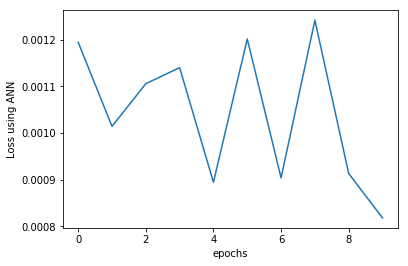

In [149]:
plt.xlabel('epochs')
plt.ylabel('Loss using ANN')
plt.plot(loss)
plt.show()

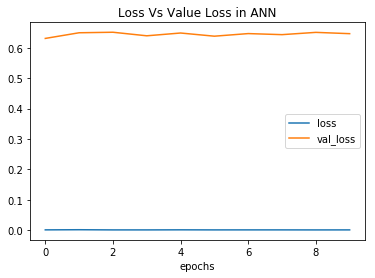

In [150]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.title('Loss Vs Value Loss in ANN')
plt.xlabel('epochs')
plt.ylabel('')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.show()

## Model-1. Decision Tree

In [151]:
#Import model for Decision Tree
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# create classifier object gor model 
model=tree.DecisionTreeClassifier()

# train the model with fit function
model.fit(trainX, trainY)

# make predictions on training data
predictions_train = model.predict(trainX)

train_DT=accuracy_score(trainY, predictions_train)
print('\nTraining Accuracy using DT:',train_DT)
#print('\nTraining Accuracy using DT :',accuracy_score(trainY, predictions_train))

print(classification_report(trainY,predictions_train)) 

# make predictions on test data
predictions_test = model.predict(testX)

test_DT=accuracy_score(testY, predictions_test)
print('\nTest Accuracy using DT:',test_DT)

#print('\nTest Accuracy using DT:',accuracy_score(testY, predictions_test))


 
print('\nConfusion matrix:\n',confusion_matrix(testY,predictions_test))
print(classification_report(testY,predictions_test)) 

#positive,negative,neutral review
#predictions_test


Training Accuracy using DT: 0.9997058823529412
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1658
           1       1.00      1.00      1.00      1742

   micro avg       1.00      1.00      1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400


Test Accuracy using DT: 0.9068219633943427

Confusion matrix:
 [[292  26]
 [ 30 253]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       318
           1       0.91      0.89      0.90       283

   micro avg       0.91      0.91      0.91       601
   macro avg       0.91      0.91      0.91       601
weighted avg       0.91      0.91      0.91       601



## Model-2. Random Forest

In [152]:
#Import model for RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# create classifier object gor model
model = RandomForestClassifier(n_estimators=100, random_state=0) 

# train the model with fit function
model.fit(trainX, trainY)
   
# make predictions on training data
predictions_train = model.predict(trainX)
print('\nTraining Accuracy using RN :',accuracy_score(trainY, predictions_train))

print(classification_report(trainY,predictions_train)) 

# make predictions on test data
predictions_test = model.predict(testX)
print('\nTest Accuracy using RN :',accuracy_score(testY, predictions_test))
 

 
print('\nConfusion matrix:\n\n',confusion_matrix(testY,predictions_test))
print(classification_report(testY,predictions_test))  



Training Accuracy using RN : 0.9997058823529412
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1658
           1       1.00      1.00      1.00      1742

   micro avg       1.00      1.00      1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400


Test Accuracy using RN : 0.9334442595673876

Confusion matrix:

 [[307  11]
 [ 29 254]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       318
           1       0.96      0.90      0.93       283

   micro avg       0.93      0.93      0.93       601
   macro avg       0.94      0.93      0.93       601
weighted avg       0.93      0.93      0.93       601



## Model-3. Naive Bayes

In [153]:
#Import model for NB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# create classifier object gor model
model=GaussianNB()

# train the model with fit function
model.fit(trainX, trainY)
   
# make predictions on training data
predictions_train = model.predict(trainX)
print('\nTraining Accuracy using NB :',accuracy_score(trainY, predictions_train))
print(classification_report(trainY,predictions_train)) 

# make predictions on test data
predictions_test = model.predict(testX)
print('\nTest Accuracy using NB :',accuracy_score(testY, predictions_test))


 
print('\nConfusion matrix:\n\n',confusion_matrix(testY,predictions_test))
print(classification_report(testY,predictions_test)) 


Training Accuracy using NB : 0.9494117647058824
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1658
           1       1.00      0.90      0.95      1742

   micro avg       0.95      0.95      0.95      3400
   macro avg       0.95      0.95      0.95      3400
weighted avg       0.95      0.95      0.95      3400


Test Accuracy using NB : 0.8419301164725458

Confusion matrix:

 [[286  32]
 [ 63 220]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       318
           1       0.87      0.78      0.82       283

   micro avg       0.84      0.84      0.84       601
   macro avg       0.85      0.84      0.84       601
weighted avg       0.84      0.84      0.84       601



## Model-4 GBM

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

gb_clf = GradientBoostingClassifier(n_estimators=4000, max_features=2, max_depth=9, random_state=0)
gb_clf.fit(trainX,trainY)

# make predictions on training data
predictions_train = gb_clf.predict(trainX)
print('\nTraining Accuracy using GBM :',accuracy_score(trainY, predictions_train))
print(classification_report(trainY,predictions_train)) 

# make predictions on test data
predictions_test = gb_clf.predict(testX)
print('\nTest Accuracy using GBM :',accuracy_score(testY, predictions_test))

 
print('\nConfusion matrix:\n\n',confusion_matrix(testY,predictions_test))
print(classification_report(testY,predictions_test)) 



Training Accuracy using GBM : 0.9926470588235294
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1658
           1       1.00      0.99      0.99      1742

   micro avg       0.99      0.99      0.99      3400
   macro avg       0.99      0.99      0.99      3400
weighted avg       0.99      0.99      0.99      3400


Test Accuracy using GBM : 0.9034941763727121

Confusion matrix:

 [[297  21]
 [ 37 246]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       318
           1       0.92      0.87      0.89       283

   micro avg       0.90      0.90      0.90       601
   macro avg       0.91      0.90      0.90       601
weighted avg       0.90      0.90      0.90       601



## Model-5. Support Vector Machine(SVM)

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Create a SVM model
svm=SVC()
svm.fit(trainX,trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [130]:
# make predictions on training data
predictions_train = svm.predict(trainX)
print('\nTraining Accuracy using SVMB :',accuracy_score(trainY, predictions_train))
print(classification_report(trainY,predictions_train)) 

# make predictions on test data
predictions_test = svm.predict(testX)
print('\nTest Accuracy using SVB :',accuracy_score(testY, predictions_test))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print('\nConfusion matrix:\n\n',confusion_matrix(testY,predictions_test))
print(classification_report(testY,predictions_test)) 


Training Accuracy using SVMB : 0.7643333333333333
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1462
           1       0.78      0.75      0.77      1538

   micro avg       0.76      0.76      0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000


Test Accuracy using SVB : 0.7490007993605116

Confusion matrix:

 [[480 148]
 [166 457]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       628
           1       0.76      0.73      0.74       623

   micro avg       0.75      0.75      0.75      1251
   macro avg       0.75      0.75      0.75      1251
weighted avg       0.75      0.75      0.75      1251



In [28]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [29]:
import matplotlib.pyplot as plt

In [30]:
from sklearn.metrics import roc_auc_score

In [32]:
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)